In [14]:
import pandas as pd
import json
import os
import numpy as np
import scipy

import matplotlib.pyplot as mpl
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

import csv

In [15]:
#2D numpy array: [0] = achiral_2, [1] = achiral_3, etc...
data = np.genfromtxt("expansions.csv", skip_header=1, delimiter=",")
data = data.transpose()

In [69]:
for a in data:
    d = scipy.stats.describe(a)
    print(d.mean)

<type 'numpy.float64'>
165.551
<type 'numpy.float64'>
197.8
<type 'numpy.float64'>
385.137
<type 'numpy.float64'>
477.646
<type 'numpy.float64'>
558.059
<type 'numpy.float64'>
675.544
<type 'numpy.float64'>
775.318
<type 'numpy.float64'>
868.752
<type 'numpy.float64'>
982.499
<type 'numpy.float64'>
243.816
<type 'numpy.float64'>
273.002
<type 'numpy.float64'>
526.977
<type 'numpy.float64'>
570.153
<type 'numpy.float64'>
741.026
<type 'numpy.float64'>
870.563
<type 'numpy.float64'>
1083.036
<type 'numpy.float64'>
1138.701
<type 'numpy.float64'>
1340.976
<type 'numpy.float64'>
157.918
<type 'numpy.float64'>
312.128
<type 'numpy.float64'>
445.064
<type 'numpy.float64'>
576.612
<type 'numpy.float64'>
671.284
<type 'numpy.float64'>
822.563
<type 'numpy.float64'>
1078.742
<type 'numpy.float64'>
1178.638
<type 'numpy.float64'>
1219.205


Text(0,0.5,'Density Dist')

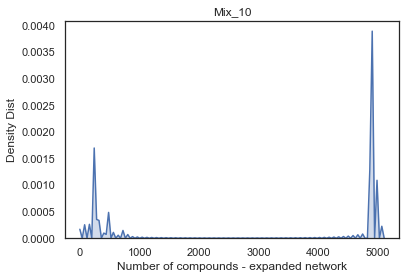

In [64]:
#test density plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#ax = sns.distplot(tuple(data[7]), hist=False)
#0-8 --> achiral 2-10
#9-17 --> chiral 2-10
#18-26 --> mix 2-10
ax = sns.kdeplot(data[26], shade=True, bw=1)
ax.set_title("Mix_10")
ax.set_xlabel("Number of compounds - expanded network")
ax.set_ylabel("Density Dist")


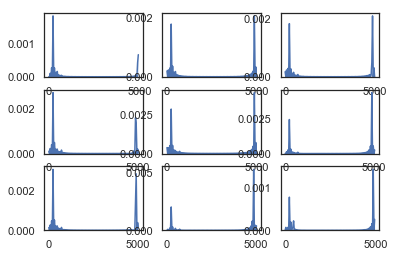

In [70]:
for i in range(1,10):
    mpl.subplot(3,3,i)
    sns.kdeplot(data[i], shade=True, bw=1)